## Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

## Association Rules Method for Books Dataset

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\9_Association Rules\\book.csv")
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
#Preprocessing
df=pd.get_dummies(data)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
#Apriori Alogrithm
frequent_itemsets= apriori(df, min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
rules= association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


Range will be [-1,1] because, leverage value is 0,
A high conviction value means that the consequent is highly depending on the antecedent and range

In [8]:
rules.sort_values('lift',ascending=False)[0:20]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [10]:
(list(range(1,11)),frequent_itemsets.itemsets[1:11])

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 1               (YouthBks)
 2                (CookBks)
 3               (DoItYBks)
 4                 (RefBks)
 5                 (ArtBks)
 6                (GeogBks)
 7               (ItalCook)
 8               (Florence)
 9     (YouthBks, ChildBks)
 10     (CookBks, ChildBks)
 Name: itemsets, dtype: object)

In [11]:
import matplotlib.pyplot as plt

<ipython-input-12-6db6be18a646>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)),height=frequent_itemsets.support[1:11],color='rgmyk');plt.xticks


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

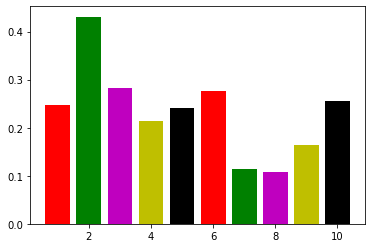

In [12]:
plt.bar(x=list(range(1,11)),height=frequent_itemsets.support[1:11],color='rgmyk');plt.xticks

## Association rules for Movies data set

In [13]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [15]:
data1 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\ExcelR\\Data Science Assignments\\9_Association Rules\\my_movies.csv")
data1.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [16]:
data1.info

<bound method DataFrame.info of               V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2      

In [17]:
data1.describe

<bound method NDFrame.describe of               V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2    

In [18]:
df1=pd.get_dummies(data1)
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
#Apriori Alogrithm
frequent_itemsets1=apriori(df1,min_support=0.1,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3..."
1393,0.1,"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3..."
1394,0.1,"(V1_Sixth Sense, V2_LOTR1, V5_LOTR2, V3_Harry ..."
1395,0.1,"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3..."


In [20]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(Green Mile),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


Range will be [-1,1] because, leverage value is 0,
A high conviction value means that the consequent is highly depending on the antecedent and range   

In [21]:
rules1.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, LOTR1, Sixth Sense, Harry Potter1)","(V3_Harry Potter1, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(Harry Potter1, Sixth Sense, LOTR2)","(LOTR1, V2_LOTR1, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V4_Green Mile, V2_LOTR1, Harry Potter1)","(LOTR1, Sixth Sense, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, Harry Potter1, LOTR2)","(LOTR1, Sixth Sense, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, Sixth Sense, V4_Green Mile)","(LOTR1, LOTR2, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V2_LOTR1, Sixth Sense, LOTR2)","(V4_Green Mile, LOTR1, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V2_LOTR1, V4_Green Mile, LOTR2)","(LOTR1, Sixth Sense, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, Harry Potter1, V5_LOTR2)","(V2_LOTR1, Sixth Sense, V4_Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(LOTR1, Sixth Sense, V5_LOTR2)","(V4_Green Mile, V2_LOTR1, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR1, V4_Green Mile, V5_LOTR2)","(V2_LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [22]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(Green Mile),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Harry Potter1),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Sixth Sense),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(V1_Sixth Sense, LOTR1, V2_LOTR1, V5_LOTR2, V3...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [23]:
(list(range(1,11)),frequent_itemsets1.itemsets[1:11])

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 1         (Gladiator)
 2             (LOTR1)
 3     (Harry Potter1)
 4           (Patriot)
 5             (LOTR2)
 6     (Harry Potter2)
 7              (LOTR)
 8        (Braveheart)
 9        (Green Mile)
 10     (V1_Gladiator)
 Name: itemsets, dtype: object)

<ipython-input-24-13d0d2fbffa1>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)),height=frequent_itemsets1.support[1:11],color='rgmyk');plt.xticks


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

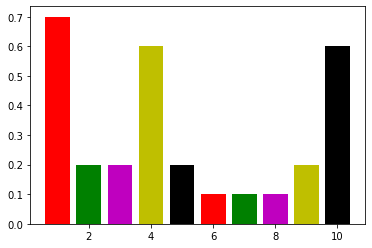

In [24]:
plt.bar(x=list(range(1,11)),height=frequent_itemsets1.support[1:11],color='rgmyk');plt.xticks